<a href="https://colab.research.google.com/github/muhamadr03/Praktikum-ML/blob/main/Praktikum%20Mandiri%204/Praktikum_Mandiri_4_RegresiLogistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, ConfusionMatrixDisplay, RocCurveDisplay
)

In [2]:
# Load dataset
data_path = '/content/drive/MyDrive/Praktikum ML/Praktikum Mandiri/data/calonpembelimobil.csv'
df = pd.read_csv(data_path)

In [3]:
# Pisahkan fitur dan label
X = df.drop(columns=['ID', 'Beli_Mobil'])
y = df['Beli_Mobil']

In [4]:
# Tentukan fitur numerik yang akan diskalakan
features_numeric = X.columns.tolist()

In [5]:
# Buat transformer untuk scaling fitur numerik
scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[('num', scaler, features_numeric)]
)

In [6]:
# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
# Buat pipeline dengan preprocessing dan model regresi logistik
model = Pipeline([
    ('prep', preprocessor),
    ('logreg', LogisticRegression())
])

In [8]:
# Latih model dengan data training
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Usia', 'Status', 'Kelamin',
                                                   'Memiliki_Mobil',
                                                   'Penghasilan'])])),
                ('logreg', LogisticRegression())])

In [9]:
# Lakukan prediksi pada data testing
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [10]:
# Evaluasi performa model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.93
Precision: 0.959349593495935
Recall: 0.9291338582677166
F1 Score: 0.944
ROC AUC Score: 0.9770251321324561

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91        73
           1       0.96      0.93      0.94       127

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



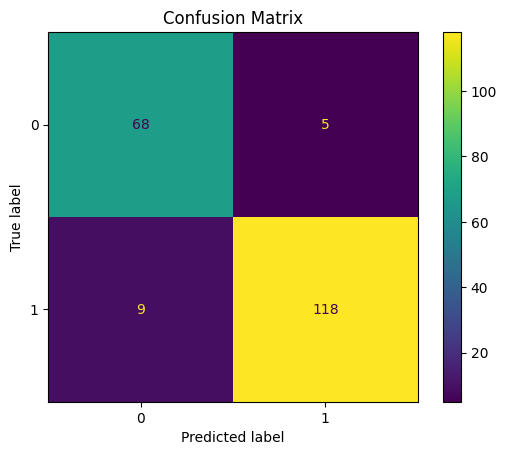

In [11]:
# Visualisasi Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

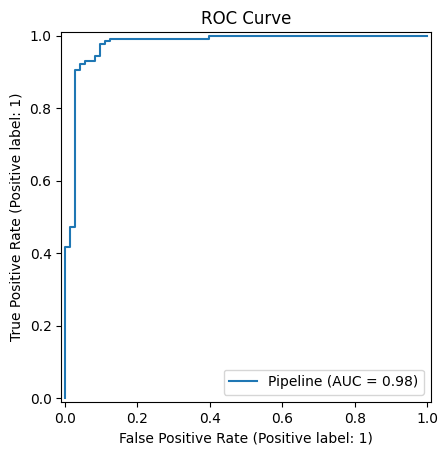

In [12]:
# Visualisasi ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()